In [3]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'D:\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Jeet\\AppData\\Local\\Temp\\pip-install-yq0zo2kt\\wordcloud_9e7537cc8c7a4b9eb5bba25717f01a3e\\setup.py'"'"'; __file__='"'"'C:\\Users\\Jeet\\AppData\\Local\\Temp\\pip-install-yq0zo2kt\\wordcloud_9e7537cc8c7a4b9eb5bba25717f01a3e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Jeet\AppData\Local\Temp\pip-wheel-k197syfb'
       cwd: C:\Users\Jeet\AppData\Local\Temp\pip-install-yq0zo2kt\wordcloud_9e7537cc8c7a4b9eb5bba25717f01a3e\
  Complete output (26 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating buil

In [5]:
import numpy as np 
import pandas as pd 
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tpot import TPOTRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split
# K-Means
from sklearn import cluster
from tpot import TPOTRegressor

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from sklearn.metrics                  import silhouette_samples, silhouette_score
#from wordcloud                        import WordCloud

import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns



# from plotly import tools
from IPython.core import display as ICD
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")
# init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)

In [6]:
udemyData = pd.read_csv("Udemy_Courses.csv")

# Data Information

Data is more than just rows and columns.

    Index : Index of rows
    Title : Title of Course
    Summary : Summary information of the course
    Enrollment : The cumulative number of students in the course
    Stars: Average Rating of the course
    Rating : The number of ratings (reviews) of the course
    Link: Link to detail page of the course
    Category: Category of course from which it related.

In [7]:
udemyData.head(5)

,Title,Summary,Enrollment,Stars,Rating,Link,Category
0,2020 Complete Python Bootcamp: From Zero to He...,Learn Python like a Professional! Start from t...,1100093,4.6,318066,https://www.udemy.com/course/complete-python-b...,Tech
1,The Web Developer Bootcamp,The only course you need to learn web developm...,596726,4.6,182997,https://www.udemy.com/course/the-web-developer...,Tech
2,Machine Learning A-Z™: Hands-On Python & R In ...,Learn to create Machine Learning Algorithms in...,692812,4.5,132228,https://www.udemy.com/course/machinelearning/,Tech
3,Angular - The Complete Guide (2020 Edition),"Master Angular 10 (formerly ""Angular 2"") and b...",422557,4.6,129984,https://www.udemy.com/course/the-complete-guid...,Tech
4,Java Programming Masterclass for Software Deve...,Learn Java In This Course And Become a Compute...,502572,4.6,123798,https://www.udemy.com/course/java-the-complete...,Tech


In [8]:
# number of features and data points
udemyData.shape

(44571, 7)

In [9]:
# information on data
udemyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44571 entries, 0 to 44570
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       44571 non-null  object 
 1   Summary     44571 non-null  object 
 2   Enrollment  44571 non-null  int64  
 3   Stars       44571 non-null  float64
 4   Rating      44571 non-null  int64  
 5   Link        44571 non-null  object 
 6   Category    44571 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.4+ MB


# Data Preparation

We can remove unnecessary columns from our data because we do not need text data to analyse the popularity of the course.

In [10]:
udemyData = udemyData.drop(['Summary', 'Link'], axis=1)

In [11]:
# let's check the unqiue values of category feature
udemyData['Category'].unique()

array(['Tech', 'Marketing', 'Finance', 'Design', 'Business'], dtype=object)

As we can see we have courses featured from all the fields, total 5 different fields to analyse.

In [12]:
udemyData['Category'].value_counts()

Business     9970
Tech         9964
Design       9962
Marketing    8788
Finance      5887
Name: Category, dtype: int64

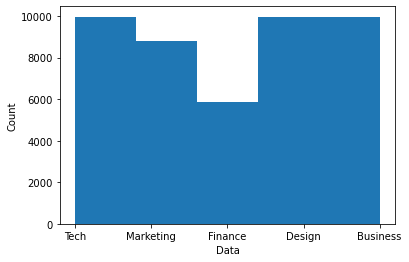

In [13]:
plt.hist(udemyData['Category'], density=False, bins=5)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Data');

Moreover, we have good enough data for all the fields which can analyse and come up with recent and upcoming fields.

In [14]:
# renaming all the features
udemyData.columns= udemyData.columns.str.lower()
udemyData

,title,enrollment,stars,rating,category
0,2020 Complete Python Bootcamp: From Zero to He...,1100093,4.6,318066,Tech
1,The Web Developer Bootcamp,596726,4.6,182997,Tech
2,Machine Learning A-Z™: Hands-On Python & R In ...,692812,4.5,132228,Tech
3,Angular - The Complete Guide (2020 Edition),422557,4.6,129984,Tech
4,Java Programming Masterclass for Software Deve...,502572,4.6,123798,Tech
...,...,...,...,...,...
44566,Business Basics for Professional Entrepreneurs,18,5.0,3,Business
44567,How to Trend on Skillshare without Followers,373,5.0,3,Business
44568,Betting Basics - How to become profitable on s...,6,5.0,3,Business
44569,Level 1 2014 CFA® Program – Corporate Finance,223,4.3,3,Business


In [15]:
udemyData.isnull().count()

title         44571
enrollment    44571
stars         44571
rating        44571
category      44571
dtype: int64

In [16]:
udemyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44571 entries, 0 to 44570
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       44571 non-null  object 
 1   enrollment  44571 non-null  int64  
 2   stars       44571 non-null  float64
 3   rating      44571 non-null  int64  
 4   category    44571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ MB


Very clear from the above two cells that we do not have any null data or row for any feature.

In [17]:
# check if ratings are higher than enrollment
dataOutlier = udemyData[udemyData['rating'] > udemyData['enrollment']]
udemyData = udemyData.drop(dataOutlier.index, axis = 0)

In [18]:
# removed outliers from data
udemyData[udemyData['rating'] > udemyData['enrollment']]

,title,enrollment,stars,rating,category


In [19]:
# final shape of our data
udemyData.shape

(44554, 5)

In [20]:
# Label Encoding
#udemyData['category'] = preprocessing.LabelEncoder().fit_transform(udemyData['category'])

In [21]:
udemyData

,title,enrollment,stars,rating,category
0,2020 Complete Python Bootcamp: From Zero to He...,1100093,4.6,318066,Tech
1,The Web Developer Bootcamp,596726,4.6,182997,Tech
2,Machine Learning A-Z™: Hands-On Python & R In ...,692812,4.5,132228,Tech
3,Angular - The Complete Guide (2020 Edition),422557,4.6,129984,Tech
4,Java Programming Masterclass for Software Deve...,502572,4.6,123798,Tech
...,...,...,...,...,...
44566,Business Basics for Professional Entrepreneurs,18,5.0,3,Business
44567,How to Trend on Skillshare without Followers,373,5.0,3,Business
44568,Betting Basics - How to become profitable on s...,6,5.0,3,Business
44569,Level 1 2014 CFA® Program – Corporate Finance,223,4.3,3,Business


# A) Top 10 courses by enrollment

In [22]:
udemyData['ratio_exptoenroll'] = udemyData['rating'] / udemyData['enrollment']
udemyData['ratio_exptoenroll']

0        0.289126
1        0.306668
2        0.190857
3        0.307613
4        0.246329
           ...   
44566    0.166667
44567    0.008043
44568    0.500000
44569    0.013453
44570    0.187500
Name: ratio_exptoenroll, Length: 44554, dtype: float64

In [23]:
n_enrollment = udemyData.nlargest(10, ['enrollment'])
n_enrollment = n_enrollment.reset_index()
n_enrollment.drop(['index'], axis = 1, inplace = True)

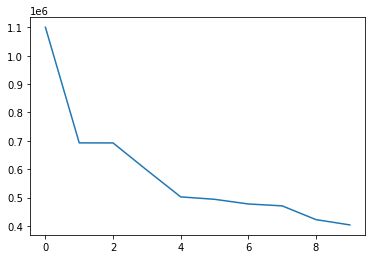

In [24]:
plt.plot(n_enrollment.index, n_enrollment['enrollment'])

From the above line graph it is very clear that how much of a difference there is between first two course enrollment. And then enrollment for all other courses are very narrowly going down.

## A.1) Check the category of courses

In [25]:
n_enrollment['category'].value_counts()

Tech         7
Design       2
Marketing    1
Name: category, dtype: int64

Out of top 10 courses 7 courses are dominated by tech related subjects. Followed by Design and marketing.

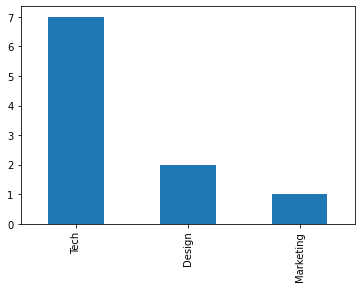

In [26]:
n_enrollment['category'].value_counts().plot(kind='bar');

## A.2) Find average start for each category in top courses

In [27]:
n_enrollment['stars'].mean()

4.52

This is the average mean for all the top courses which is pretty decent out 5. Let's check it for each category.

In [28]:
n_enrollment.groupby(['category'])['stars'].mean()

category
Design       4.550000
Marketing    4.400000
Tech         4.528571
Name: stars, dtype: float64

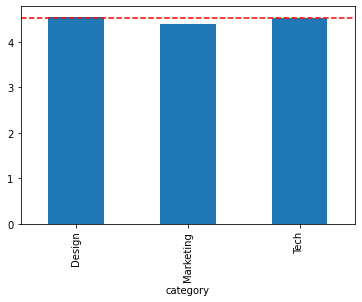

In [29]:
n_enrollment.groupby(['category'])['stars'].mean().plot(kind='bar')
plt.axhline(y = n_enrollment['stars'].mean(), color ="red", linestyle ="--")

As we can see our threshold is set at 4.5 and Design and Tech courses are of little more better in stars than Marketing. Also, if we consider the weight of number of data points for each category then it becomes more impressive for tech courses.

# B) Rating to enrollment ratio

In [30]:
udemyData['ratio_exptoenroll'] = udemyData['rating'] / udemyData['enrollment']
udemyData['ratio_exptoenroll']

0        0.289126
1        0.306668
2        0.190857
3        0.307613
4        0.246329
           ...   
44566    0.166667
44567    0.008043
44568    0.500000
44569    0.013453
44570    0.187500
Name: ratio_exptoenroll, Length: 44554, dtype: float64

Let's see ratio of top 10 course.

In [31]:
n_enrollment[:10]

,title,enrollment,stars,rating,category,ratio_exptoenroll
0,2020 Complete Python Bootcamp: From Zero to He...,1100093,4.6,318066,Tech,0.289126
1,Machine Learning A-Z™: Hands-On Python & R In ...,692812,4.5,132228,Tech,0.190857
2,Automate the Boring Stuff with Python Programming,692617,4.6,70508,Tech,0.101799
3,The Web Developer Bootcamp,596726,4.6,182997,Tech,0.306668
4,Java Programming Masterclass for Software Deve...,502572,4.6,123798,Tech,0.246329
5,The Complete Digital Marketing Course - 12 Cou...,494107,4.4,117014,Marketing,0.236819
6,The Complete Python 3 Course: Beginner to Adva...,477630,4.2,19145,Tech,0.040083
7,Adobe Photoshop CC: Your Complete Beginner to ...,470991,4.6,16005,Design,0.033982
8,Angular - The Complete Guide (2020 Edition),422557,4.6,129984,Tech,0.307613
9,The Ultimate Drawing Course - Beginner to Adva...,403865,4.5,98984,Design,0.245092


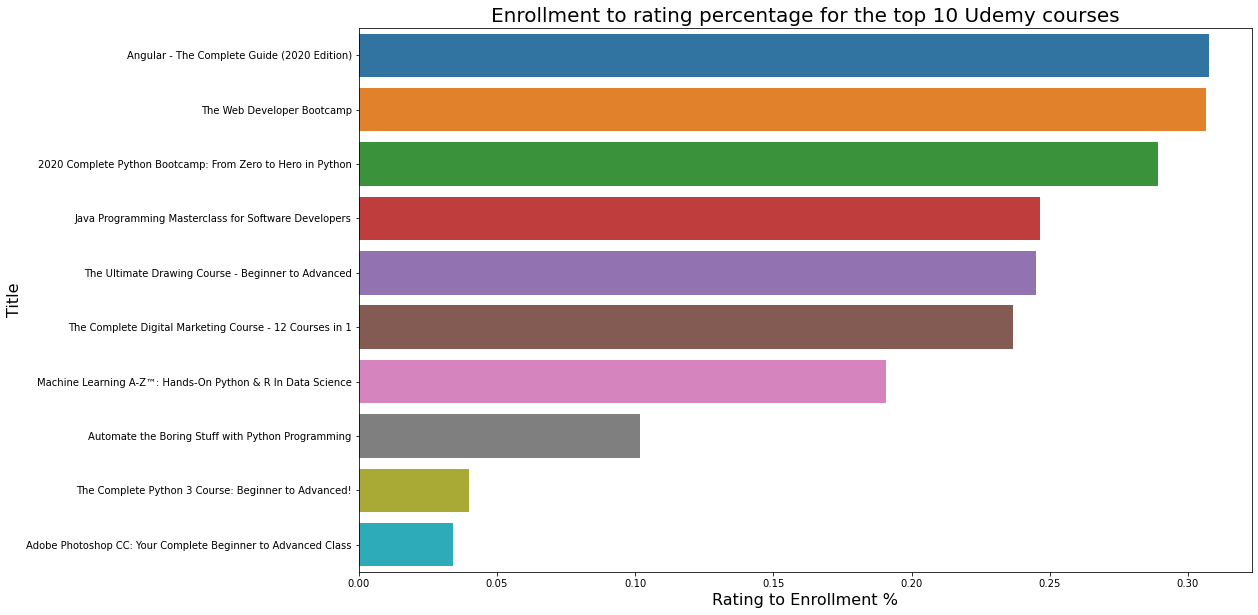

In [32]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(y='title', x='ratio_exptoenroll', data=n_enrollment.sort_values(by='ratio_exptoenroll', ascending=False), ax=ax)
plt.xlabel('Rating to Enrollment %', fontsize=16)
plt.ylabel('Title', fontsize=16)
plt.title('Enrollment to rating percentage for the top 10 Udemy courses', fontsize=20);

# C) Cluster the courses 

In [33]:
# relations between features
udemyData.corr()

,enrollment,stars,rating,ratio_exptoenroll
enrollment,1.000000,0.077894,0.802861,-0.087587
stars,0.077894,1.000000,0.053806,0.220908
rating,0.802861,0.053806,1.000000,0.053563
ratio_exptoenroll,-0.087587,0.220908,0.053563,1.000000


Enrollment and rating are highly correlated with each other.

# TF-IDF

In [34]:
sentences_list = []
for sentence in udemyData['title']:
    sentences_list.append(sentence) 

In [35]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [36]:
def processCorpus(sentences_list, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    for document in sentences_list:
        index = sentences_list.index(document)
        sentences_list[index] = sentences_list[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        sentences_list[index] = sentences_list[index].replace(',', '')          # Removes commas
        sentences_list[index] = sentences_list[index].rstrip('\n')              # Removes line breaks
        sentences_list[index] = sentences_list[index].casefold()                # Makes all letters lowercase
        
        
        sentences_list[index] = re.sub('\W_',' ', sentences_list[index])        # removes specials characters and leaves only words
        sentences_list[index] = re.sub("\S*\d\S*"," ", sentences_list[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        sentences_list[index] = re.sub("\S*@\S*\s?"," ", sentences_list[index]) # removes emails and mentions (words with @)
        sentences_list[index] = re.sub(r'http\S+', '', sentences_list[index])   # removes URLs with http
        sentences_list[index] = re.sub(r'www\S+', '', sentences_list[index]) 
        
        listOfTokens = word_tokenize(sentences_list[index])
        twoLetterWord = twoLetters(listOfTokens)
        
        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        
        sentences_list[index]   = " ".join(listOfTokens)
        sentences_list[index] = unidecode(sentences_list[index])
        
        return sentences_list

In [37]:
language = 'english'
corpus = processCorpus(sentences_list, language)

# tf-idf

In [38]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

# Kmeans

In [39]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(14 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [40]:
k = 14
kmeans_results = run_KMeans(k, tf_idf)

In [41]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

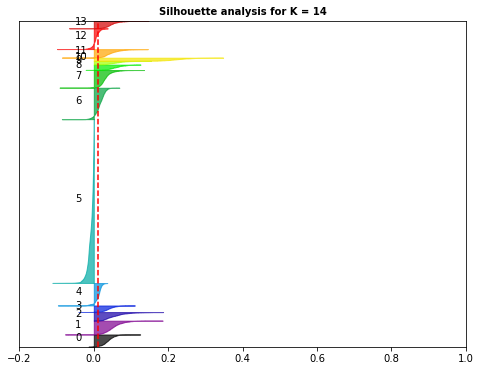

In [42]:
# Plotting Silhouette Analysis
silhouette(kmeans_results, tf_idf, plot=True)

In [43]:
inertias = []
for index in kmeans_results:
    inertias.append(kmeans_results[index].inertia_)

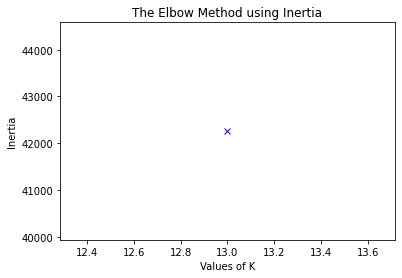

In [44]:
K = range(13, 14)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [49]:
# do not touch this
best_result = 14
kmeans = kmeans_results.get(best_result)

In [50]:
best_result = 14
higher_kmeans = kmeans_results.get(best_result)

In [51]:
final_df_array = tf_idf.to_numpy()

In [52]:
prediction = kmeans.predict(tf_idf)

In [53]:
labels = kmeans.labels_ 
udemyData['label'] = labels
udemyData.tail(5)

,title,enrollment,stars,rating,category,ratio_exptoenroll,label
44566,Business Basics for Professional Entrepreneurs,18,5.0,3,Business,0.166667,5
44567,How to Trend on Skillshare without Followers,373,5.0,3,Business,0.008043,6
44568,Betting Basics - How to become profitable on s...,6,5.0,3,Business,0.500000,6
44569,Level 1 2014 CFA® Program – Corporate Finance,223,4.3,3,Business,0.013453,5
44570,Storytelling In Business,16,3.3,3,Business,0.187500,5


In [54]:
udemyData['label'].value_counts()

5     22439
6      4306
4      3067
12     2841
7      2421
1      1884
0      1680
2      1167
11     1160
13     1035
3       893
8       727
9       502
10      432
Name: label, dtype: int64

# Classification

In [55]:
udemyData['category'].value_counts()

Business     9968
Tech         9964
Design       9960
Marketing    8781
Finance      5881
Name: category, dtype: int64

In [56]:
final_data = udemyData.drop(['title'], axis = 1)
final_data['category'] = udemyData['category'].map({'Tech': 1, 'Business': 2, 'Design': 3, 'Marketing': 4, 'Finance': 5})
target_data = final_data.drop(['rating', 'category', 'ratio_exptoenroll', 'label', 'stars'], axis = 1)
target_data

,enrollment
0,1100093
1,596726
2,692812
3,422557
4,502572
...,...
44566,18
44567,373
44568,6
44569,223


In [57]:
remaining_columns = final_data.drop(['rating', 'ratio_exptoenroll', 'enrollment', 'stars'], axis = 1)
remaining_columns

,category,label
0,1,5
1,1,12
2,1,5
3,1,0
4,1,5
...,...,...
44566,2,5
44567,2,6
44568,2,6
44569,2,5


In [75]:
X_train, X_test, y_train, y_test = train_test_split(remaining_columns, target_data,
                                                    train_size=0.75, test_size=0.25, random_state=42)

In [59]:
# custom tpot configuration
tpot_config = {
    'sklearn.multioutput.MultiOutputRegressor': {
    }
}


In [60]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -216591895.21658367

Generation 2 - Current best internal CV score: -216591895.21658367

Generation 3 - Current best internal CV score: -216588545.60322443

Generation 4 - Current best internal CV score: -216588545.60322443

Generation 5 - Current best internal CV score: -216588545.60322443

Best pipeline: ExtraTreesRegressor(KNeighborsRegressor(input_matrix, n_neighbors=13, p=2, weights=uniform), bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=11, min_samples_split=2, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [61]:
print(tpot.score(X_test, y_test))

-308280613.36439383


In [62]:
preds = tpot.predict(X_test)

In [76]:
X_test

,category,label
34526,3,5
37729,2,13
21235,5,5
34029,3,5
34782,2,5
...,...,...
17259,4,5
23637,5,5
33340,3,5
14482,4,12


In [63]:
preds

array([1884.95949036, 2676.69555647, 1492.42537023, ..., 1884.95949036,
       2677.43011675, 1884.95949036])

In [64]:
y_test

,enrollment
34526,8
37729,202
21235,9
34029,89
34782,8981
...,...
17259,33
23637,406
33340,155
14482,5


# Second approach

In [65]:
target_data.shape

(44554, 1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, target_data, test_size=0.3, random_state=0)


In [67]:
#tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
#tpot.fit(X_train, y_train)

# Prediction

In [91]:
test_tdidf = vectorizer.transform(["Artificial Intelligence"]) 

In [85]:
test_cluster = kmeans.predict(test_tdidf)

In [86]:
test_cluster[0]

13

In [92]:
data = {'category': [1], 'label': [test_cluster[0]]}  
# Create DataFrame  
df = pd.DataFrame(data)  

In [93]:
df

,category,label
0,1,13


In [94]:
preds = tpot.predict(df)

In [95]:
preds[0]

3644.075280755061